In [1]:
using Plots
using LinearAlgebra
using Printf
using LaTeXStrings

In [2]:
Plots.theme(:dao)

In [3]:
# Define the original function f(x)
function f(x)
    return exp(-x^2) * (x^7 - 5x^6 + 4x^4 + x^3 - 2x^2 + 10x + 6)
end

f (generic function with 1 method)

In [4]:
# Function to generate equally spaced points in an interval
function generate_points(a, b, n)
    return range(a, b, length=n)
end

generate_points (generic function with 1 method)

In [5]:
# Function to compute the coefficients of cubic splines with not-a-knot condition
function cubic_spline_not_a_knot(x, y)
    n = length(x) - 1
    h = diff(x)
    
    # Build the tridiagonal system
    A = zeros(n+1, n+1)
    b = zeros(n+1)
    
    # Interior points
    for i in 2:n
        A[i,i-1] = h[i-1]
        A[i,i] = 2(h[i-1] + h[i])
        A[i,i+1] = h[i]
        b[i] = 3((y[i+1] - y[i])/h[i] - (y[i] - y[i-1])/h[i-1])
    end
    
    # Not-a-knot conditions
    if n > 2
        # Left endpoint
        A[1,1] = h[2]
        A[1,2] = -(h[1] + h[2])
        A[1,3] = h[1]
        
        # Right endpoint
        A[n+1,n-1] = h[n]
        A[n+1,n] = -(h[n-1] + h[n])
        A[n+1,n+1] = h[n-1]
    else
        # For n ≤ 2, use natural spline conditions
        A[1,1] = 1
        A[n+1,n+1] = 1
    end
    
    # Solve the system to get the second derivatives
    M = A \ b
    
    # Return the spline coefficients for each interval
    coeffs = []
    for i in 1:n
        # Calculate cubic coefficients
        a = y[i]
        b = (y[i+1] - y[i])/h[i] - h[i]*M[i]/3 - h[i]*M[i+1]/6
        c = M[i]/2
        d = (M[i+1] - M[i])/(6*h[i])
        
        push!(coeffs, (a, b, c, d))
    end
    
    return coeffs
end

cubic_spline_not_a_knot (generic function with 1 method)

In [6]:
# Function to evaluate the spline at a point
function evaluate_spline(x_eval, x, coeffs)
    # Find the appropriate interval
    i = searchsortedlast(x, x_eval)
    i = max(1, min(i, length(coeffs)))
    
    # Get the coefficients
    a, b, c, d = coeffs[i]
    
    # Calculate the relative position
    dx = x_eval - x[i]
    
    # Evaluate the cubic polynomial
    return a + b*dx + c*dx^2 + d*dx^3
end

evaluate_spline (generic function with 1 method)

In [25]:
# Main program to compare different numbers of points
function compare_interpolations()
    # Define the interval and points for evaluation
    a, b = -2, 2
    x_eval = range(a, b, length=200)
    y_true = f.(x_eval)

    # Numbers of points to try
    n_points = [4, 8, 12]

    # Create the plot
    p = plot(x_eval, y_true, label=L"$f(x)$", 
             linewidth=3, title="Cubic Spline Interpolations")

    # Colors for different interpolations
    colors = [:red, :blue, :green]

    # Compute and plot interpolations for different numbers of points
    for (i, n) in enumerate(n_points)
        # Generate points
        x = collect(generate_points(a, b, n))
        y = f.(x)

        # Compute spline coefficients
        coeffs = cubic_spline_not_a_knot(x, y)

        # Evaluate spline at all points
        #y_spline = [evaluate_spline(xe, x, coeffs) for xe in x_eval]

        # Plot the interpolation
        plot!(p, x_eval, [evaluate_spline(xe, x, coeffs) for xe in x_eval], 
              label=L"$p_{%$n}(x)$", 
              color=colors[i], 
              line=(2, :dash))

        # Plot the interpolation points
        scatter!(p, x, y, 
                label="", 
                color=colors[i], 
                markersize=4, 
                legend=:best,
                # line=(3, :solid), 
                titlefontsize = 20,
                tickfontsize = 12,
                legendfontsize = 10,
                yguidefontsize = 15,
                xguidefontsize = 15,
                right_margin = 2 * Plots.mm,
            )
    end

    # Customize the plot
    xlabel!(p, L"$x$")
    ylabel!(p, L"$f(x)$")

    return p
end

compare_interpolations (generic function with 1 method)

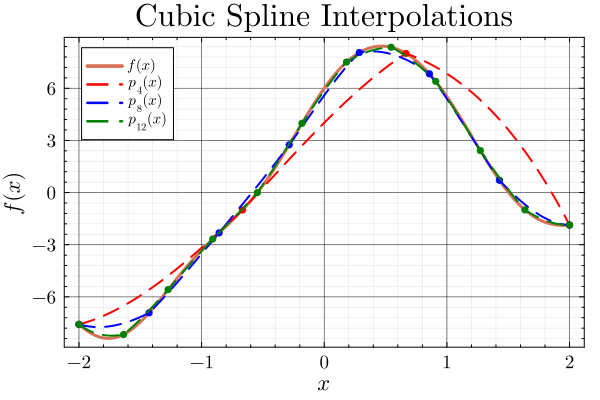

In [26]:
# Run the comparison and display the plot
p = compare_interpolations()
#display(p)
# savefig("prob1_splines.pdf")

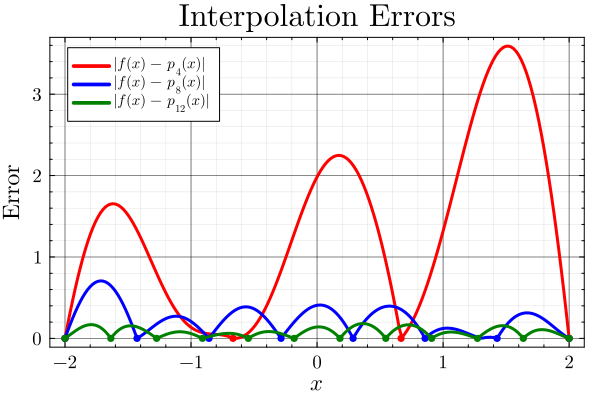

"/home/belster/JuliaFiles/CompMethods/hw2/spline_errors.pdf"

In [ ]:
# Now plot the error
# Function to plot errors of spline interpolations
function plot_interpolation_errors()
    # Define the interval and points for evaluation
    a, b = -2, 2
    x_eval = range(a, b, length=200)
    y_true = f.(x_eval)
    
    # Numbers of points to try
    n_points = [4, 8, 12]
    
    # Create the error plot
    p = plot(title="Interpolation Errors",
            # yscale=:log10,
            # yticks=10.0 .^ (-16:2:2)
            )
    
    # Colors for different interpolations
    colors = [:red, :blue, :green]
    
    # Store maximum and minimum errors for y-axis limits
    #max_error = -Inf
   # min_error = Inf
    
    # Compute and plot errors for different numbers of points
    for (i, n) in enumerate(n_points)
        # Generate points
        x = collect(generate_points(a, b, n))
        y = f.(x)
        
        # Compute spline coefficients
        coeffs = cubic_spline_not_a_knot(x, y)
        
        # Evaluate spline at all points
        y_spline = [evaluate_spline(xe, x, coeffs) for xe in x_eval]
        
        # Compute absolute error
        error = abs.(y_true - y_spline)
        
        # Update max and min errors
        #max_error = max(max_error, maximum(error))
        #min_error = min(min_error, minimum(filter(x -> x > 0, error)))
        
        # Plot the error
        plot!(p, x_eval, error,
              label=L"$|f(x) - p_{%$n}(x)|$",
              color=colors[i],
              linewidth=3)
              
        # Add markers for the interpolation points
        scatter!(p, x, abs.(y - f.(x)),
                label="",
                color=colors[i],
                markersize=4)
    end
    
    # Set y-axis limits based on actual error ranges
    plot!(p, #ylims=(10^(floor(log10(min_error))-1), 10^(ceil(log10(max_error))+1))
    )
    
    # Customize the plot
    xlabel!(p, L"$x$")
    ylabel!(p, "Error")
    plot!(p, legend=:best,
          titlefontsize=20,
          tickfontsize=12,
          legendfontsize=10,
          yguidefontsize=15,
          xguidefontsize=15,
          right_margin=2Plots.mm,
          # size=(800,500)
          )
    
    return p
end

# Run the error analysis and display the plot
p = plot_interpolation_errors()
display(p)
# savefig("spline_errors.pdf") 

In [84]:
# Function to compute the integral of the absolute error
function compute_error_integral(n)
    # Define the interval
    a, b = -2, 2
    
    # Generate interpolation points
    x_interp = collect(generate_points(a, b, n))
    y_interp = f.(x_interp)
    
    # Compute spline coefficients
    coeffs = cubic_spline_not_a_knot(x_interp, y_interp)
    
    # Function to compute error at a point
    function error_at_point(x)
        # Find the appropriate interval
        i = searchsortedlast(x_interp, x)
        i = max(1, min(i, length(coeffs)))
        
        # Get the coefficients
        a, b, c, d = coeffs[i]
        
        # Calculate the relative position
        dx = x - x_interp[i]
        
        # Evaluate the spline
        spline_val = a + b*dx + c*dx^2 + d*dx^3
        
        # Return absolute error
        return abs(spline_val - f(x))
    end
    
    # Use high-precision numerical integration
    integral, _ = quadgk(error_at_point, -2, 2)
    
    return integral
end

using QuadGK  # For numerical integration

# Compute and display error integrals for different n
n_points = [4, 8, 12]
error_integrals = Float64[]

println("Error integrals for different numbers of points:")
for n in n_points
    integral = compute_error_integral(n)
    push!(error_integrals, integral)
    println("n = $n points: ∫|p_$n(x) - f(x)|dx = $(round(integral, digits=6))")
end

# Find best result
best_n = n_points[argmin(error_integrals)]
println("\nBest result achieved with n = $best_n points")

Error integrals for different numbers of points:
n = 4 points: ∫|p_4(x) - f(x)|dx = 5.361024
n = 8 points: ∫|p_8(x) - f(x)|dx = 0.947717
n = 12 points: ∫|p_12(x) - f(x)|dx = 0.326542

Best result achieved with n = 12 points


In [86]:
# plot results from the integration above
n = [4, 8, 12]
ints = [6.120747, 0.560679, 0.117997]

# plot of the ``total error'' (integral from -2 to 2 of the relative error)
plot(n, ints, 
    marker=:circle, 
    lw=3, 
    markersize=4,
    label=L"$\int |p_n(x)-f(x)| dx$", 
    xlabel=L"$n$", 
    ylabel=L"$\int |p_n(x)-f(x)| dx$", 
    # xscale=:log10, 
    # yscale=:log10, 
    legend=:best, 
    title="Total Error in Splines", 
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    # right_margin=2Plots.mm,
    left_margin=2Plots.mm)
savefig("total_spline__error.pdf")

"/home/belster/JuliaFiles/CompMethods/hw2/total_spline__error.pdf"